Some parameters : 
* criterion {“gini”, “entropy”, “log_loss”}, default=”gini”
* splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
* max_depth(int), default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* min_samples_split(int or float), default=2
The minimum number of samples required to split an internal node:
    * If int, then consider min_samples_split as the minimum number.
    * If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
* min_samples_leaf(int or float), default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
    * If int, then consider min_samples_leaf as the minimum number.
    * If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
* max_features(int, float or {“auto”, “sqrt”, “log2”}), default=None
The number of features to consider when looking for the best split:
    * If int, then consider max_features features at each split.
    * If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
    * If “sqrt”, then max_features=sqrt(n_features).
    * If “log2”, then max_features=log2(n_features).
    * If None, then max_features=n_features.

* random_state(int), RandomState instance or None, default=None

* max_leaf_nodes(int), default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

* min_impurity_decrease(float), default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

The weighted impurity decrease equation is the following:
```
N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)
```
where N is the total number of samples, 
N_t is the number of samples at the current node, 
N_t_L is the number of samples in the left child, 
N_t_R is the number of samples in the right child,

In [243]:
import seaborn as sns
df = sns.load_dataset('iris')
classes = df['species'].unique()

In [244]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [245]:
y = df['species']
X = df.drop(columns='species')

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [247]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_leaf=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=3)

In [248]:
y_pred = clf.predict(X_test)

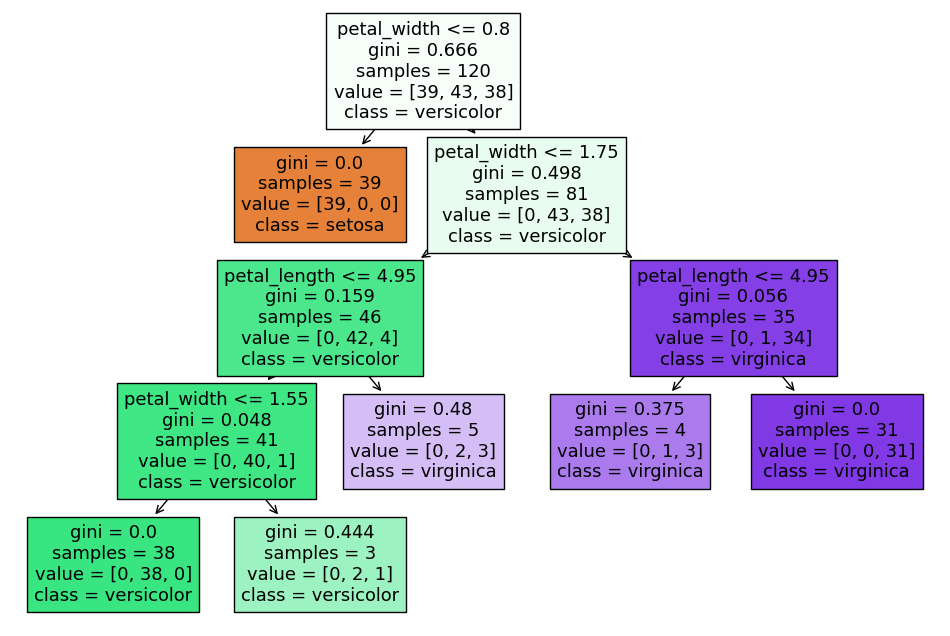

In [249]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=classes)
plt.show()

In [250]:
print("Info about tree :-\n")
print("Node count ::", clf.tree_.node_count)
print("Left children ::", clf.tree_.children_left)
print("Right children ::", clf.tree_.children_right)
print("Features ::", clf.tree_.feature)
print("Thresholds ::", clf.tree_.threshold)
print("Values ::", clf.tree_.value)

Info about tree :-

Node count :: 11
Left children :: [ 1 -1  3  4  5 -1 -1 -1  9 -1 -1]
Right children :: [ 2 -1  8  7  6 -1 -1 -1 10 -1 -1]
Features :: [ 3 -2  3  2  3 -2 -2 -2  2 -2 -2]
Thresholds :: [ 0.80000001 -2.          1.75        4.95000005  1.55000001 -2.
 -2.         -2.          4.95000005 -2.         -2.        ]
Values :: [[[39. 43. 38.]]

 [[39.  0.  0.]]

 [[ 0. 43. 38.]]

 [[ 0. 42.  4.]]

 [[ 0. 40.  1.]]

 [[ 0. 38.  0.]]

 [[ 0.  2.  1.]]

 [[ 0.  2.  3.]]

 [[ 0.  1. 34.]]

 [[ 0.  1.  3.]]

 [[ 0.  0. 31.]]]


In [251]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared: 1.0
Accuracy Score: 1.0
Confusion Matrix : 
[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
Full report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

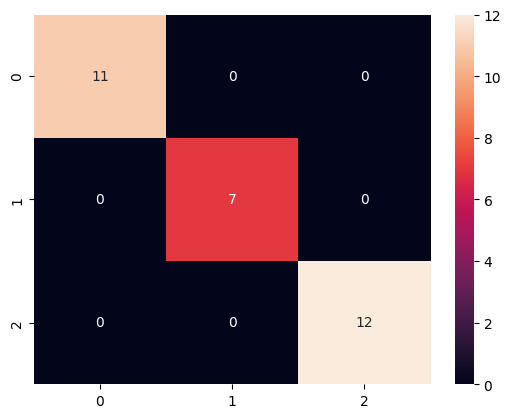

In [252]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
import seaborn as sns
sns.heatmap(cm, annot=True)